In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Part1: Loading Data and Initializing Variables

In [6]:
# Loading and visualizing XRD dataset
xrd_df = pd.read_csv('Model_FeCoNi-XRD.csv', header=None)
xrd_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,19.00,19.01,19.02,19.03,19.04,19.05,19.05,19.06,19.07,19.08,...,54.92,54.93,54.94,54.95,54.95,54.96,54.97,54.98,54.99,55.0
1,36.08,36.04,36.01,35.99,35.96,35.84,35.69,35.53,35.38,35.24,...,152.80,151.00,148.70,146.40,144.00,143.40,144.10,144.70,145.30,146.9
2,39.94,39.68,39.41,39.14,39.02,38.90,38.79,38.68,38.27,37.86,...,213.90,213.90,213.80,213.70,214.80,216.00,217.30,218.50,218.40,217.9
3,46.65,46.79,46.93,47.07,47.22,47.37,47.13,46.59,46.04,45.49,...,207.80,208.40,209.00,209.70,210.50,211.20,211.30,208.60,205.90,203.3
4,30.06,29.97,29.78,29.58,29.39,29.18,28.95,28.73,28.51,28.51,...,161.80,161.80,162.10,162.50,162.90,164.40,166.70,168.90,171.20,172.6


In [12]:
#Setting up X and Y
cols = len(xrd_df.columns)
X = xrd_df.iloc[0,:]
y = xrd_df.iloc[1:cols,:]

print('Shape of X is {}, shape of y is {}'.format(X.shape, y.shape))

Shape of X is (4000,), shape of y is (306, 4000)


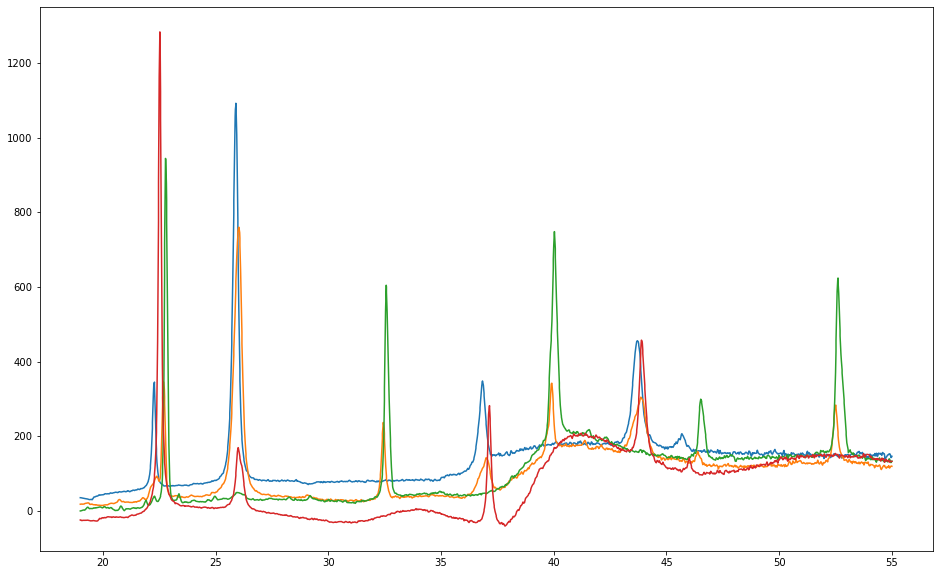

In [8]:
# Plotting XRD diffraction patterns
plt.figure(figsize=(16,10))

for i in range(len(y)):
    if i%100 == 0:
        plt.plot(X,y.iloc[i,:])

In [10]:
# Loading simplfied XRD patterns (dimentions simplified from 306*4000 to 306*9)
xrd_feature_df = pd.read_csv('Model_FeCoNi-XRD_feature.csv', header=None)
xrd_feature_df.head()

,0,1,2,3,4,5,6,7,8
0,22,22.5,25.5,32.5,36.5,39.5,43.6,46.5,52.5
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [14]:
# Setting up X, Y and m,n as dimentions of the 
cols = xrd_feature_df.shape[0]
X_f = xrd_feature_df.iloc[0:1,:]
y_f = xrd_feature_df.iloc[1:cols,:]
m,n = xrd_feature_df.shape

print('Shape of the original data is {}, of the simplified data is {}'.format(xrd_df.shape, xrd_feature_df.shape))
print('Shape of X is {}, shape of y is {}'.format(X_f.shape, y_f.shape))

Shape of the original data is (307, 4000), of the simplified data is (307, 9)
Shape of X is (1, 9), shape of y is (306, 9)


### Part2: Distance Matricies and Linkages Calculation + Dendrogram Visualiztion

In [15]:
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from itertools import combinations 

In [16]:
# Combinations Function (Probably will not be used)
def combo(coordinates):
    combos = combinations(coordinates, 2) 
    combos_list = []
    for i in combos:
        combos_list.append(i)
    
    return combos_list  

In [17]:
# Calculate all necessary properties for the experiment
def outputCluster(mat, dist_type, link_type, max_cluster):
    C = distance.pdist(mat, dist_type)
    D = linkage(C, link_type)
    E = fcluster(D, t=max_cluster, criterion='maxclust')
    
    return C,D,E

In [20]:
# Calculating values for the simplified dataset
y_dist, y_link, y_clusters = outputCluster(y_f, 'cosine', 'average', 3)
print('The shape of simplified data: {}'.format(y_f.shape))
print('Distance Matrix shape: {}, Linkage Matrix Shape: {}'.format(y_dist.shape, y_link.shape))
print('Total amount of Clusters: {}'.format(y_clusters.shape))

The shape of simplified data: (306, 9)
Distance Matrix shape: (46665,), Linkage Matrix Shape: (305, 4)
Total amount of Clusters: (306,)


In [69]:
# Calculating values for original dataset
y_dist_4k, y_link_4k, y_clusters_4k = outputCluster(y, 'cosine', 'average', 6)
print('The shape of simplified data: {}'.format(y.shape))
print('Distance Matrix shape: {}, Linkage Matrix Shape: {}'.format(y_dist_4k.shape, y_link_4k.shape))
print('Total amount of Clusters: {}'.format(y_clusters_4k.shape))

The shape of simplified data: (306, 4000)
Distance Matrix shape: (46665,), Linkage Matrix Shape: (305, 4)
Total amount of Clusters: (306,)


In [27]:
# Visualization

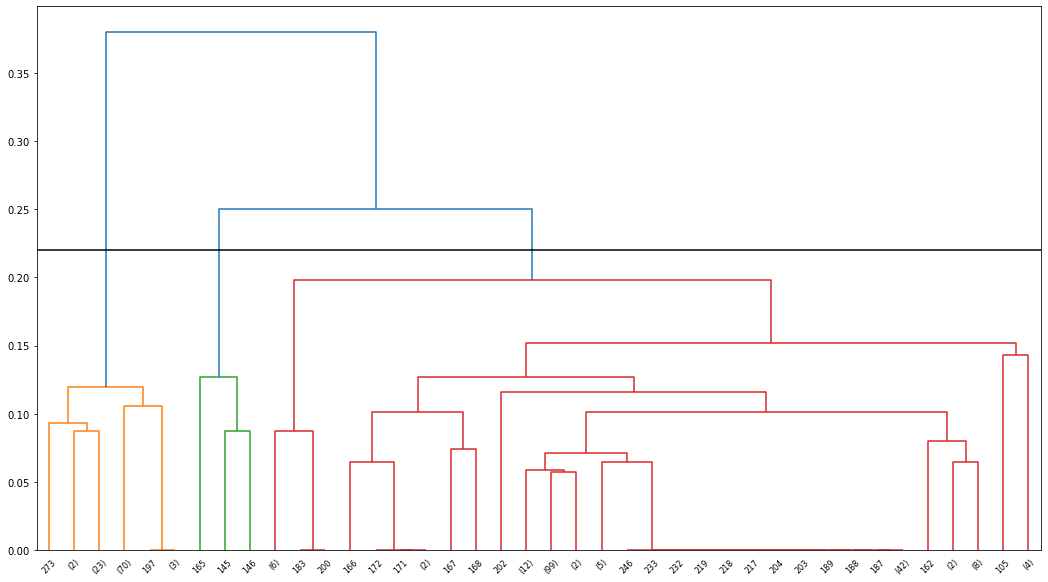

In [76]:
# Plotting simplified data dendrogram
fig = plt.figure(figsize=(18, 10))

dn = dendrogram(y_link, truncate_mode='lastp', color_threshold=0.22, p=40)
plt.axhline(y=0.22, c='k')

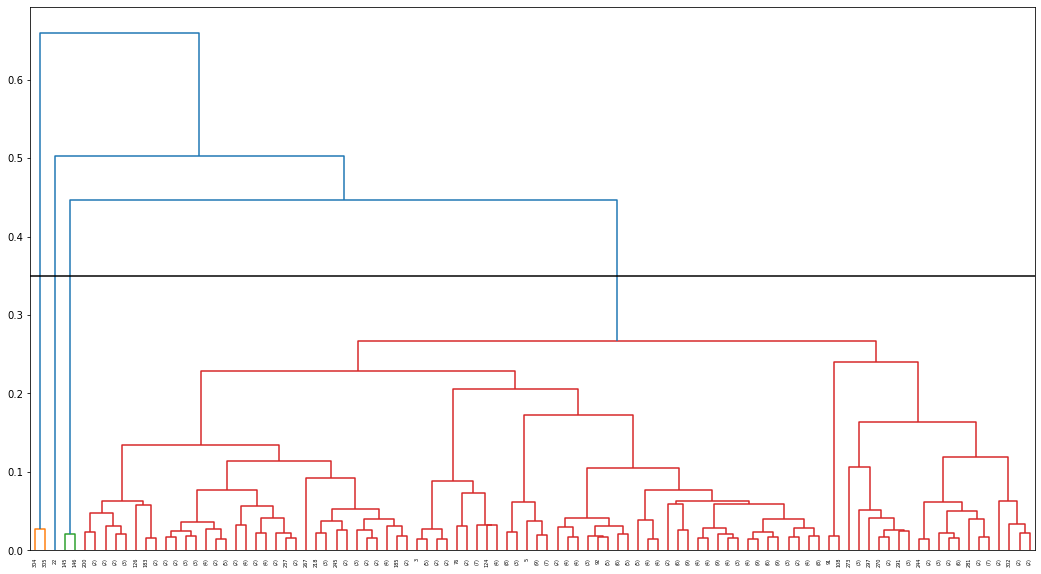

In [74]:
# Plotting original data dendrogram
fig = plt.figure(figsize=(18, 10))

dn = dendrogram(y_link_4k, truncate_mode='lastp', color_threshold=0.35, p=100)
plt.axhline(y=0.35, c='k')

### Operations on Composition Data + Phase Diagram Visualization

In [32]:
# Transforming Composition Matrix

In [33]:
# Read the FeCoNi composition data
composition = pd.read_csv('Model_FeCoNi_composition.csv')
composition.head()

,Ni,Fe,Co
0,0.81677,0.14052,0.04271
1,0.84141,0.09866,0.05994
2,0.76940,0.17711,0.05349
3,0.79372,0.13579,0.07049
4,0.81808,0.09447,0.08745


In [34]:
# Set up verticies to transform the composition data to triangular coordinate system
a = np.array([0, 0, 0])
b = np.array([0.5, 0.866, 0])
c = np.array([1, 0, 0])

verticies = np.matrix(np.array([a, b, c]))
T = verticies.T

composition_arr = composition.to_numpy()
composition_mat = np.matrix(composition_arr)

In [35]:
# Commencing transformation
comp_trans = (T * (composition_mat.T)).T
comp_trans_mod = np.array(comp_trans[:,0:2])

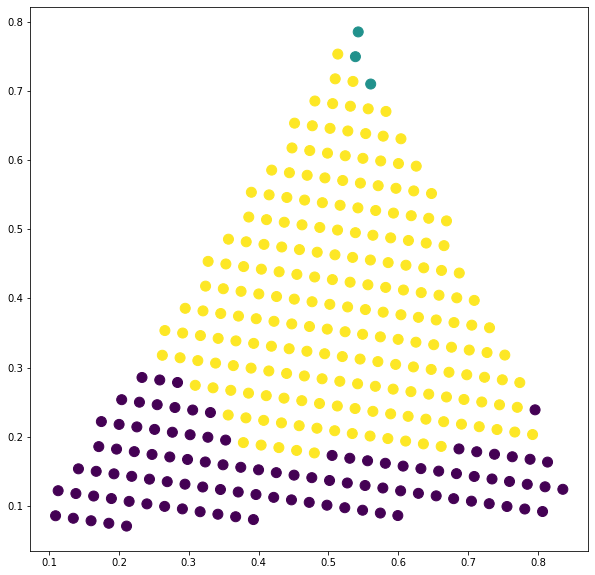

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(comp_trans_mod[:,0],comp_trans_mod[:,1], s=100, c=y_clusters)

### Part 4: An Easy Approach to Part2 and Part3 With Sklearn

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
# Alternative (easier) method in Python
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
y_cluster_sk = cluster.fit_predict(y_f)

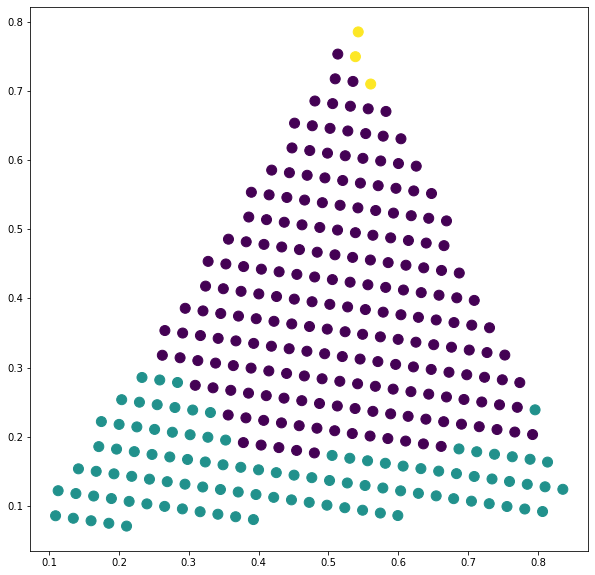

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(comp_trans_mod[:,0],comp_trans_mod[:,1], s=100, c=y_cluster_sk)